<h1>Linear Algebra (CpE210A)</h1>

<h3>Laboratory 1: Plotting Vectors using NumPy and MatPlotLib</h3>

<p>Coded and submitted by:<br>Vallarta, Troy Joaquin G.<br>58010</p>

\begin{equation*}
{(Eq.1)} dist_{total} = (long_{total}) \hat{x} + (lat_{total}) \hat{y}
\end{equation*}


\begin{equation*}
{(Eq.2)} disp = \sqrt{{dist_x}^2 + {dist_y}^2}
\end{equation*}

\begin{equation*}
{(Eq.3)} \theta = \arctan{\left(\frac{y}{\alpha + x} \right)}
\end{equation*}

<h1>Question 1</h1>
<h5>Lab Exericses: </h5>

In [1]:
import numpy as np
from numpy import random as ra
from numpy import linalg as alg
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
def track_eagle(make_figs=True):
    long = ra.randint(-10,10, size=3)        ## since we don't actually have eagle tracking data we will use
    lat = ra.randint(-10,10, size=3)         ## random integers for this activity. These two lines will produce
                                             ## a vector with shape of (3,) describing the distances for the 
                                             ## eagle's flight.
    
    dist1 = np.array([long[0],lat[0]])       ## setup the array for each vector for the eagle's flight.
    dist2 = np.array([long[1],long[1]])
    dist3 = np.array([long[2],lat[2]])
    
    
    
    dist_total = dist1 + dist2 + dist3                        ## compute for the resultant vector for the eagle's flight.
    disp = alg.norm(dist_total)                                 ## compute for the magnitude of the displacement
                                                                ## the formula that it use is equation 2
    alpha = 10 ** -6
    theta =  np.arctan(dist_total[1] / dist_total[0] + alpha)   ## compute for the angle of the displacement. Hint
                                                                ## The formula that it use is equation 3
    theta = np.degrees(theta)                                   ## convert theta from rad to deg.
     
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    ### Self-discovery code block (Refer to guide question 2 for the task)
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
               label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
               label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
               label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs == True:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    plt.show()
 

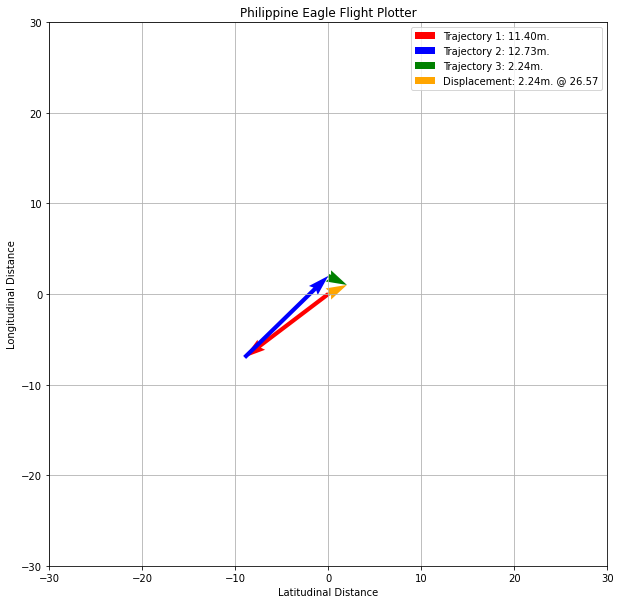

In [3]:
track_eagle(make_figs=False) ## Let 'make_figs' equal to False during debugging. 
                                #Only flip it to True if the researcher wants to export to computer the graph created below

<h1>Question 2</h1>
 Equations: <br>

\begin{equation*}
{(Eq.1)}s_{t}= 2{t}^3 + {t}^2 + 3{t} +2
\end{equation*}


\begin{equation*}
{(Eq.2)}v_{t}= 6{t}^2 + 2{t} + 3
\end{equation*}

\begin{equation*}
{(Eq.3)}a_{t}= 12{t} + 2
\end{equation*}

based on the code below, the programmer noticed that it the Velocity function of time is derivative of the speed fuction of time. The acceleration function time is the derivative of velocity function time. The function is for kinematics of the eagle's motion to the nest. The programmer did not use displacement, therefore the programmer needs to make a function of kinematics with derivative. The acceleration and the velocity before the if statement is not used. The output is the speed(t), velocity(t), and acceleration(t) respectively. 

In [4]:
def eagle_kinematics(speed, time):
    req_shape = 4
    velocity = np.zeros(req_shape-1)
    accel = np.zeros(req_shape-2)
    time_vect = np.array([time**3, time**2, time, 1])
    if speed.shape == (req_shape,):
        velocity = np.array([3*speed[0],2*speed[1], speed[2]])
        accel = np.array([2*velocity[0],velocity[1]])
        speed_t = np.sum(np.multiply(speed, time_vect))
        velocity_t = np.sum(np.multiply(velocity, time_vect[1:]))
        accel_t = np.sum(np.multiply(accel, time_vect[2:]))
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return speed_t, velocity_t, accel_t

In [5]:
speed = np.array([2,1,3,2])
time = 2
eagle_kinematics(speed, time)

(28, 31, 26)

<h3>Optimizing the code:</h3>

In [6]:
def eagle_kinematics(speed, time,accel, velocity):
    req_shape = 4
    time_vect = np.array([time**3, time**2, time, 1])
    if speed.shape == (req_shape,) and velocity.shape == (req_shape-1,) and accel.shape == (req_shape-2,):
        speed_t = np.sum(np.multiply(speed, time_vect))
        velocity_t = np.sum(np.multiply(velocity, time_vect[1:]))
        accel_t = np.sum(np.multiply(accel, time_vect[2:]))
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return speed_t, velocity_t, accel_t

The speed, velocity, and acceleration value comes from the equations

In [8]:
speed = np.array([2,1,3,2])      #eq1
velocity = np.array([6,2,3])     #eq2
accel = np.array([12,2])         #eq3
time = 2 
eagle_kinematics(speed, time,accel,velocity)

(28, 31, 26)

In [9]:
def month_profit_trace(profit, reach, make_figs=True): ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,))  and (reach.shape == (4,)) :
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        

        week_total = week1 + week2 + week3 + week4     
        week_performance = alg.norm(week_total)
        alpha = 10**-6
        reach_gradient = np.degrees(np.arctan(week_total[1]/week_total[0]))
    

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        
        
        ## put necessary vector plotting code here
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(alg.norm(week1)))
        
        plt.quiver(week1[0],week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='lime', width=0.0025,
                   label='Week 2: {:.2f}'.format(alg.norm(week2)))
        plt.quiver(np.add(week1[0], week2[0]), np.add(week1[1], week2[1]), week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='green', width=0.0025,
                   label='Week 3: {:.2f}'.format(alg.norm(week3)))
        
        plt.quiver(week1[0]+week2[0]+week3[0],week1[1]+week2[1]+week3[1], week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='darkgreen', width=0.0025,
                   label='Week 4: {:.2f}'.format(alg.norm(week4)))

        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Dimension error') ## Make a more appropriate error statement. 

## END OF FUNCTION  

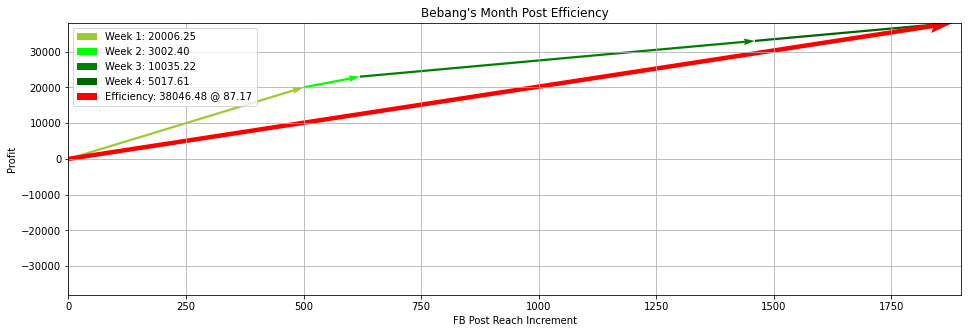

In [10]:
profit= np.array([20_000, 3_000, 10_000, 5_000])    ## You can change the values to make different scenarios
reach = np.array([500, 120, 840, 420])             ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False) ## Toggle 'make_figs' during debugging or making documentations